# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Democratizing Autonomous Driving


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
import json

In [2]:
np.random.seed(42)
df = pd.read_csv('../data/merged_driving_log.csv')
df.head()

,center,left,right,steering,throttle,reverse,speed
0,dataset-1/IMG/center_2016_12_01_13_30_48_404.jpg,dataset-1/IMG/left_2016_12_01_13_30_48_404.jpg,dataset-1/IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
1,dataset-1/IMG/center_2016_12_01_13_31_12_937.jpg,dataset-1/IMG/left_2016_12_01_13_31_12_937.jpg,dataset-1/IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
2,dataset-1/IMG/center_2016_12_01_13_31_13_037.jpg,dataset-1/IMG/left_2016_12_01_13_31_13_037.jpg,dataset-1/IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
3,dataset-1/IMG/center_2016_12_01_13_31_13_177.jpg,dataset-1/IMG/left_2016_12_01_13_31_13_177.jpg,dataset-1/IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236
4,dataset-1/IMG/center_2016_12_01_13_31_13_279.jpg,dataset-1/IMG/left_2016_12_01_13_31_13_279.jpg,dataset-1/IMG/right_2016_12_01_13_31_13_279.jpg,0.0,0.0,0.0,1.403993


In [18]:
number = int(np.random.choice(9268, 1))

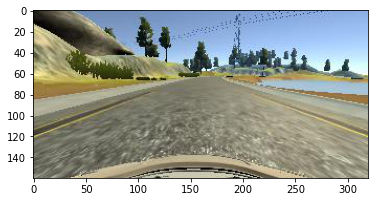

In [71]:
img = mpimg.imread('../data/'+df.center[number])
plt.imshow(img)
plt.savefig('../charts/before_after/before.png');

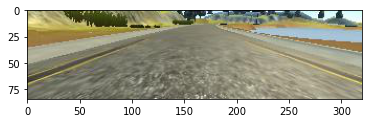

In [68]:
def crop(img):
    img = img[50:-25, :, :]
    return img

plt.imshow(crop(img))
plt.savefig('../charts/before_after/after_crop.png');

In [33]:
def brightness(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    ratio = 1.0 + 0.4 * (np.random.rand() - 0.5)
    hsv[:,:,2] =  hsv[:,:,2] * ratio
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

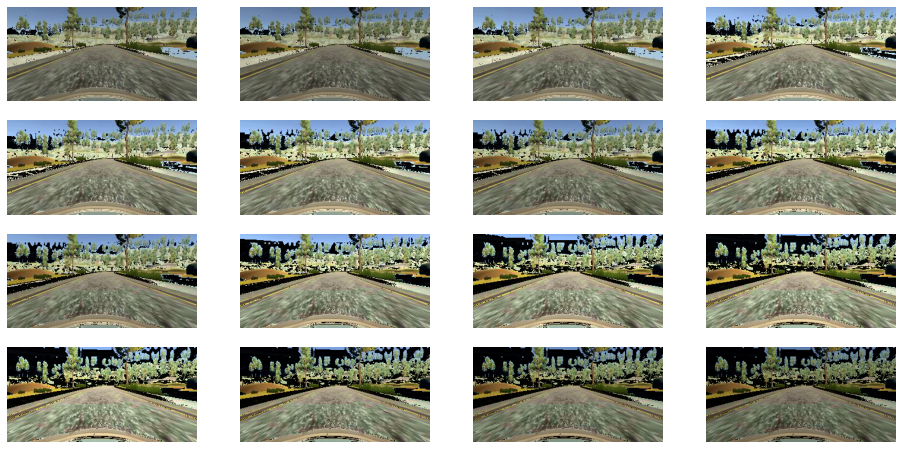

In [102]:
plt.figure(figsize=(16,8))
for i in range(16):
    img = brightness(img)
    plt.subplot(4,4,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.savefig('../charts/before_after/after_brightness.png')

In [64]:
def shadow(image):
    IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 160, 320, 3
    x1, y1 = IMAGE_WIDTH * np.random.rand(), 0
    x2, y2 = IMAGE_WIDTH * np.random.rand(), IMAGE_HEIGHT
    xm, ym = np.mgrid[0:IMAGE_HEIGHT, 0:IMAGE_WIDTH]

    mask = np.zeros_like(image[:, :, 1])
    mask[(ym - y1) * (x2 - x1) - (y2 - y1) * (xm - x1) > 0] = 1

    cond = mask == np.random.randint(2)
    s_ratio = np.random.uniform(low=0.2, high=0.5)

    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    hls[:, :, 1][cond] = hls[:, :, 1][cond] * s_ratio
    return cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)

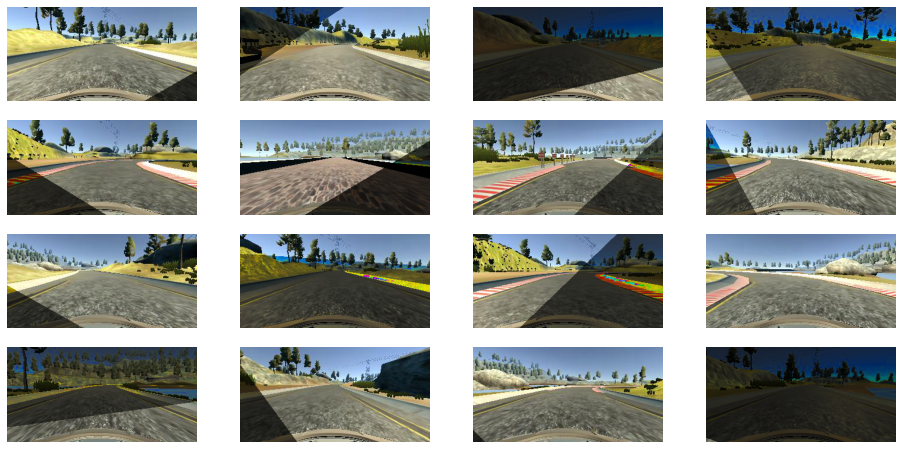

In [76]:
plt.figure(figsize=(16,8))
for i in range(16):
    number = int(np.random.choice(9268, 1))
    img = mpimg.imread('../data/'+df.center[number])
    img = shadow(img)
    plt.subplot(4,4,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.savefig('../charts/before_after/after_shadow.png')

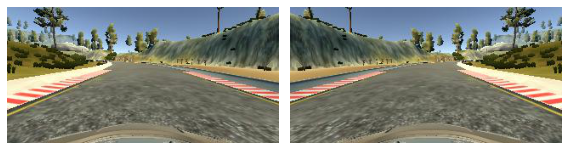

In [103]:
plt.figure(figsize=(8,8))

number = int(np.random.choice(9268, 1))
img = mpimg.imread('../data/'+df.center[number])
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')

img = cv2.flip(img, 1)
plt.subplot(1,2,2)
plt.imshow(img)
plt.axis('off')

plt.tight_layout()
plt.savefig('../charts/before_after/after_flip.png')

In [2]:
model = json.load(open('../assets/model_15_epochs', 'r'))

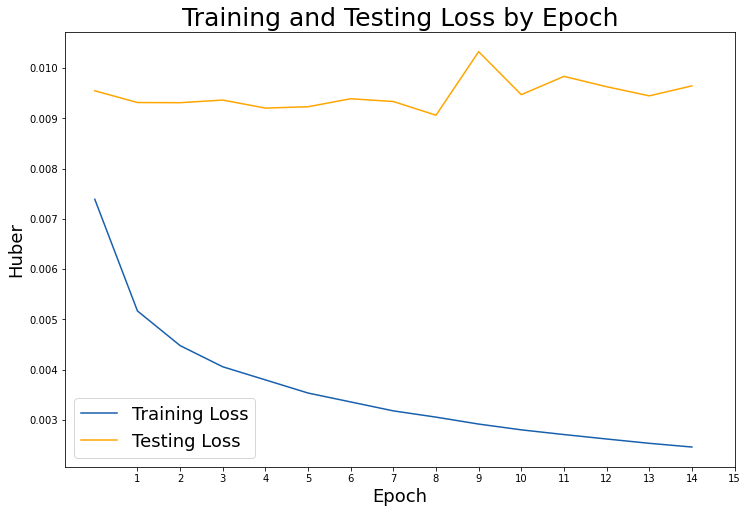

In [4]:
# credit to CNN lecture note
plt.figure(figsize=(12, 8))

plt.plot(model['loss'], label='Training Loss', color='#185fad')
plt.plot(model['val_loss'], label='Testing Loss', color='orange')

plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Huber', fontsize=18)
plt.xticks(range(1, 16))    # ticks, labels

plt.legend(fontsize=18)
plt.savefig('../charts/loss_by_epoch.png');